In [23]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import requests
import csv

from citipy import citipy
from config import weather_api_key
from datetime import datetime
from scipy.stats import linregress
import timeit


In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [6]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
# Openweather API

# e54b389430ada7e562d27816cae2bdaa

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

587

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e54b389430ada7e562d27816cae2bdaa"
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e54b389430ada7e562d27816cae2bdaa


In [10]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e54b389430ada7e562d27816cae2bdaa&q=Boston


In [11]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [12]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    # WHERE IS CITIES DEFINED IN MODULE!!!!???
        # Cell 3 

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | rakitnoye
Processing Record 3 of Set 1 | vao
Processing Record 4 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 5 of Set 1 | salamiyah
Processing Record 6 of Set 1 | samarai
Processing Record 7 of Set 1 | ribeira grande
Processing Record 8 of Set 1 | hasaki
Processing Record 9 of Set 1 | iqaluit
Processing Record 10 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 11 of Set 1 | ilulissat
Processing Record 12 of Set 1 | sitka
Processing Record 13 of Set 1 | pacific grove
Processing Record 14 of Set 1 | amderma
City not found. Skipping...
Processing Record 15 of Set 1 | ocos
Processing Record 16 of Set 1 | mandalgovi
Processing Record 17 of Set 1 | vaini
Processing Record 18 of Set 1 | chokurdakh
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | geraldton
Processing Record 21 of Set 1 | avar

Processing Record 37 of Set 4 | raduzhnyy
Processing Record 38 of Set 4 | whitehorse
Processing Record 39 of Set 4 | lerwick
Processing Record 40 of Set 4 | bayir
Processing Record 41 of Set 4 | katangli
Processing Record 42 of Set 4 | toliary
City not found. Skipping...
Processing Record 43 of Set 4 | maniitsoq
Processing Record 44 of Set 4 | zharkent
Processing Record 45 of Set 4 | calabozo
Processing Record 46 of Set 4 | samusu
City not found. Skipping...
Processing Record 47 of Set 4 | norman wells
Processing Record 48 of Set 4 | walvis bay
Processing Record 49 of Set 4 | mandera
Processing Record 50 of Set 4 | marseille
Processing Record 1 of Set 5 | barrow
Processing Record 2 of Set 5 | gold coast
Processing Record 3 of Set 5 | calvinia
Processing Record 4 of Set 5 | troitskoye
Processing Record 5 of Set 5 | chicama
Processing Record 6 of Set 5 | lokosovo
Processing Record 7 of Set 5 | kodiak
Processing Record 8 of Set 5 | georgetown
Processing Record 9 of Set 5 | yambio
Processi

Processing Record 30 of Set 8 | salcea
Processing Record 31 of Set 8 | cockburn town
Processing Record 32 of Set 8 | bubaque
Processing Record 33 of Set 8 | lamont
Processing Record 34 of Set 8 | constitucion
Processing Record 35 of Set 8 | mutsamudu
City not found. Skipping...
Processing Record 36 of Set 8 | takoradi
Processing Record 37 of Set 8 | zambezi
Processing Record 38 of Set 8 | ust-kamchatsk
City not found. Skipping...
Processing Record 39 of Set 8 | betioky
Processing Record 40 of Set 8 | samdrup jongkhar
Processing Record 41 of Set 8 | aberdeen
Processing Record 42 of Set 8 | gat
Processing Record 43 of Set 8 | marystown
Processing Record 44 of Set 8 | ust-maya
Processing Record 45 of Set 8 | ruatoria
City not found. Skipping...
Processing Record 46 of Set 8 | utiroa
City not found. Skipping...
Processing Record 47 of Set 8 | itaiba
Processing Record 48 of Set 8 | grants
Processing Record 49 of Set 8 | diego de almagro
Processing Record 50 of Set 8 | ewa beach
Processing R

Processing Record 19 of Set 12 | vanimo
Processing Record 20 of Set 12 | merrill
Processing Record 21 of Set 12 | shache
Processing Record 22 of Set 12 | araouane
Processing Record 23 of Set 12 | xiangdong
City not found. Skipping...
Processing Record 24 of Set 12 | santa luzia
Processing Record 25 of Set 12 | marsaxlokk
Processing Record 26 of Set 12 | simi
Processing Record 27 of Set 12 | karad
Processing Record 28 of Set 12 | mehamn
Processing Record 29 of Set 12 | pyapon
Processing Record 30 of Set 12 | hami
Processing Record 31 of Set 12 | aconibe
Processing Record 32 of Set 12 | laguna
Processing Record 33 of Set 12 | bela
Processing Record 34 of Set 12 | nova olimpia
Processing Record 35 of Set 12 | llanes
Processing Record 36 of Set 12 | gizo
Processing Record 37 of Set 12 | muisne
-----------------------------
Data Retrieval Complete      
-----------------------------


In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,53.26,71,75,13.80,AR,2022-01-22 00:08:28
1,Rakitnoye,50.8389,35.8515,26.85,94,100,14.34,RU,2022-01-22 00:10:12
2,Vao,-22.6667,167.4833,79.05,86,87,9.95,NC,2022-01-22 00:06:15
3,Salamiyah,35.0113,37.0532,40.12,54,89,8.95,SY,2022-01-22 00:10:13
4,Samarai,-10.6167,150.6667,82.42,71,100,5.88,PG,2022-01-22 00:10:13
5,Ribeira Grande,38.5167,-28.7000,61.05,73,26,12.35,PT,2022-01-22 00:10:14
6,Hasaki,35.7333,140.8333,36.28,45,3,10.09,JP,2022-01-22 00:10:14
7,Iqaluit,63.7506,-68.5145,-18.31,75,88,8.99,CA,2022-01-22 00:10:14
8,Ilulissat,69.2167,-51.1000,8.62,72,100,16.11,GL,2022-01-22 00:10:15
9,Sitka,57.0531,-135.3300,46.29,87,100,11.50,US,2022-01-22 00:10:15


In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

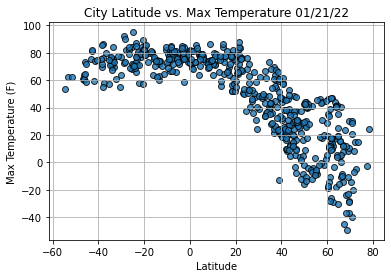

In [18]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

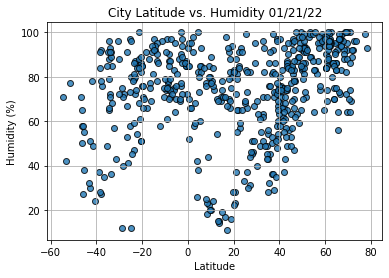

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

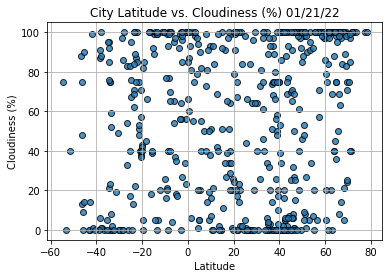

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

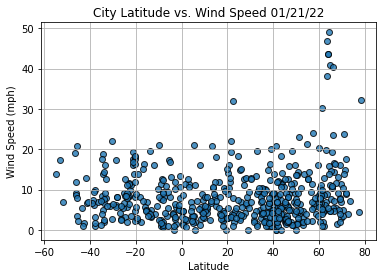

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [25]:

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

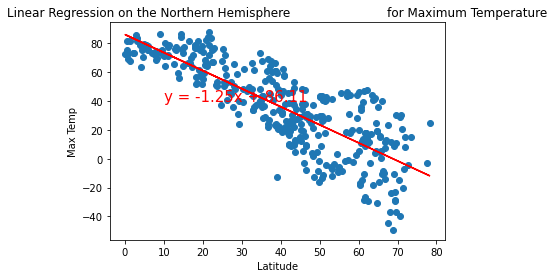

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

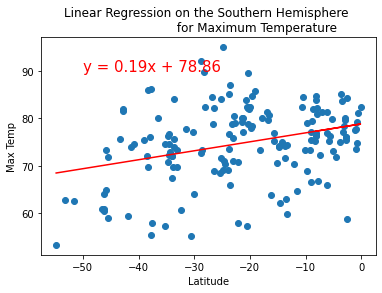

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n \
                        for Maximum Temperature', 'Max Temp',(-50,90))


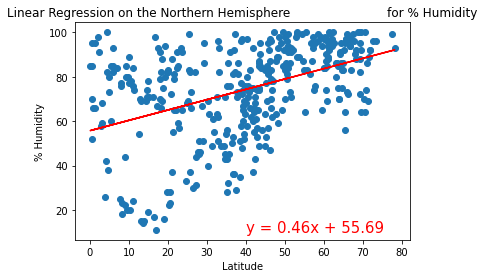

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

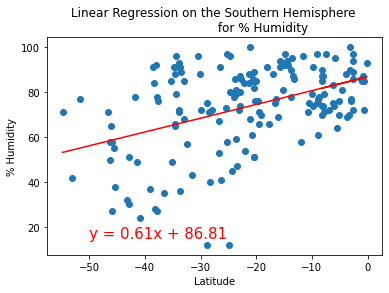

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n \
                        for % Humidity', '% Humidity',(-50,15))

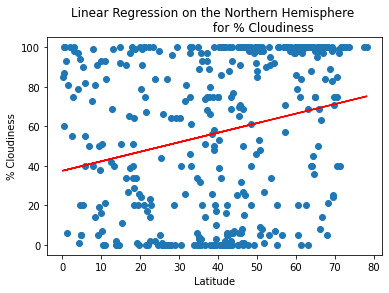

In [51]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n \
                        for % Cloudiness', '% Cloudiness',(-50,60))

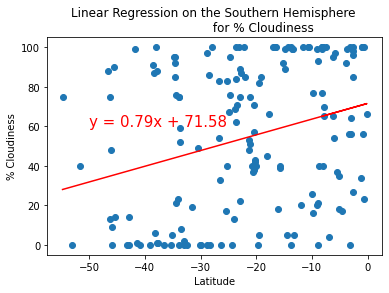

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n \
                        for % Cloudiness', '% Cloudiness',(-50,60))

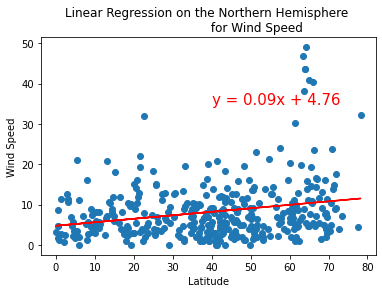

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n \
                        for Wind Speed', 'Wind Speed',(40,35))

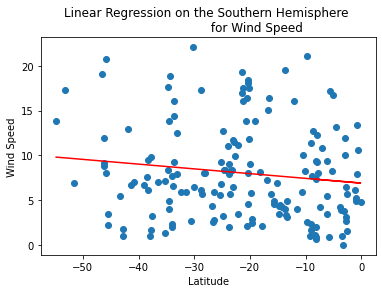

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n \
                        for Wind Speed', 'Wind Speed',(-50,35))
